In [1]:
from utils import prepare_image_forgery_dataset

data_directory = '../data'

IMG_SIZE=(128, 128)

X_train, X_test, y_train, y_test = prepare_image_forgery_dataset(total_number=4000, test_size=0.2, random_state=42, 
                                                                 data_directory=data_directory, img_size=IMG_SIZE)

2024-07-09 14:21:26.363235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 14:21:26.363306: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 14:21:26.366087: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-09 14:21:26.375693: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 14:21:27.156357: W tensorflow/compiler/tf2

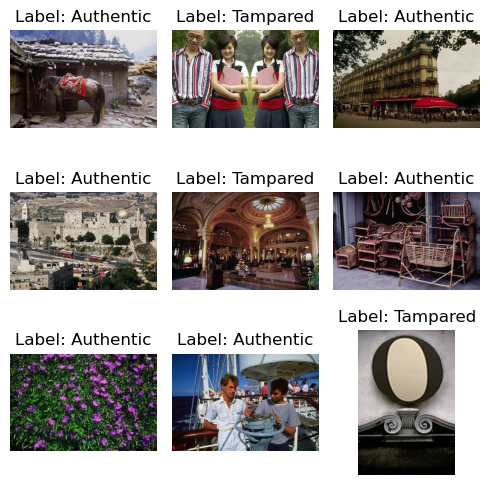

In [2]:
from utils import display_images

classnames = ['Authentic', 'Tampared']

display_images(X_train, y_train, classnames=classnames)

In [3]:
from sklearn.metrics import accuracy_score
from models.cnn import CNNImageForgeryDetector
from models.svm import SVMImageForgeryDetector
from models.fine_tuning import TransferLearningImageForgeryDetector

# base_models = [SVMImageForgeryDetector(use_edges=False, use_noise=False, use_texture=False, img_size=IMG_SIZE) for _ in range(10)]

# base_models = [TransferLearningImageForgeryDetector(img_size=IMG_SIZE, learning_rate=0.0001) for _ in range(1)] + \
#               [SVMImageForgeryDetector(use_edges=False, use_noise=False, use_texture=False, img_size=IMG_SIZE) for _ in range(1)] + \
#               [CNNImageForgeryDetector(img_size=IMG_SIZE, compression_quality=80, learning_rate=0.0001) for _ in range(1)]

base_models = [CNNImageForgeryDetector(compression_quality=80, learning_rate=0.0001, img_size=IMG_SIZE, epochs=4) for _ in range(5)]

In [4]:
from models.adaboosting import AdaBoostingImageForgeryDetector

boosting_model = AdaBoostingImageForgeryDetector(base_models, learning_rate=0.5)
boosting_model.fit(X_train, y_train)

Pre-train weights:
Sum of weights: 1.0000
Mean weight: 0.0003
Min weight: 0.0003
Max weight: 0.0003
Epoch 1/4
81/81 [==============================] - 74s 904ms/step - loss: 2.3793e-04 - accuracy: 0.5926 - val_loss: 0.6571 - val_accuracy: 0.5868
Epoch 2/4
81/81 [==============================] - 71s 882ms/step - loss: 2.2044e-04 - accuracy: 0.6192 - val_loss: 0.6224 - val_accuracy: 0.6354
Epoch 3/4
81/81 [==============================] - 72s 889ms/step - loss: 2.0761e-04 - accuracy: 0.6485 - val_loss: 0.6216 - val_accuracy: 0.6354
Epoch 4/4
90/90 [==============================] - 10s 106ms/step
CNNImageForgeryDetector train
{'Falsos positivos (FP)': 7, 'Falsos negativos (FN)': 875, 'Verdaderos positivos (TP)': 276, 'Verdaderos negativos (TN)': 1722, 'Precisión': 0.9752650176678446, 'Exhaustividad (Recall)': 0.23979148566463945, 'Puntaje F1': 0.38493723849372385, 'Precisión global (Accuracy)': 0.69375}
Error: 0.30625
Peso del modelo: 0.40885495160085367
10/10 [========================

In [5]:
boosting_model.print_history()

Validation Error History:
1: 0.3719
2: 0.3563
3: 0.3875
4: 0.3937
5: 0.3937
Validation Model Weights:
1: 0.4089
2: 0.6448
3: 0.7853
4: 0.4771
5: 0.5577


In [6]:
from utils import print_model_performance_metrics
y_pred = boosting_model.predict(X_test)
print_model_performance_metrics(y_test, y_pred)

25/25 [==============================] - 3s 109ms/step
+----------------------+--------------------+
| Metric               |              Value |
+----------------------+--------------------+
| False Positives (FP) |                251 |
| False Negatives (FN) |                 56 |
| True Positives (TP)  |                264 |
| True Negatives (TN)  |                229 |
| Precision            |  0.512621359223301 |
| Recall               |              0.825 |
| F1-score             | 0.6323353293413174 |
| Overall Accuracy     |            0.61625 |
+----------------------+--------------------+


: 